In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import struct
from scipy import signal
import pywt
from math import sqrt

%pylab inline

pwd = os.getcwd()
fb = open(pwd + "//" + "input_data" + "//" + "test" + "//" + "100" + "//" + "3", "rb")
x = 0
data1 = []
data2 = []

interval = 5
dt = 0.0000001 * interval
fs = 10000000 / interval
start = int(250000 / interval)
end = int(450000 / interval)
fig_size = 20

while True:
    data = fb.read(4)
    if not data:
        break
    if x % interval == 0:
        ch1, ch2 = struct.unpack('<HH', data)
        ch1 = (float(ch1) - 8192) / 8192 * 2.5
        ch2 = (float(ch2) - 8192) / 8192 * 2.5
        ch1 = float(ch1)
        ch2 = float(ch2)
        data1.append(ch1)
        data2.append(ch2)
    x = x + 1

fb.close()

data1 = data1[start:end]
data2 = data2[start:end]

wavelet = 'morl'
c = pywt.central_frequency(wavelet)
fa = np.arange(400000, 20000 - 1, -20000)
scales = np.array(float(c)) * fs / np.array(fa)

[cfs1,frequencies1] = pywt.cwt(data1,scales,wavelet,dt)
[cfs2,frequencies2] = pywt.cwt(data2,scales,wavelet,dt)
power1 = (abs(cfs1)) ** 2
power2 = (abs(cfs2)) ** 2

length_now = len(power2[0])
power1 = np.reshape(power1,(len(power1),fig_size,int(length_now/fig_size)))
power2 = np.reshape(power2,(len(power2),fig_size,int(length_now/fig_size)))
power1 = np.log10(np.mean(power1,axis=2))
power2 = np.log10(np.mean(power2,axis=2))

mx = power1.max()
mn = power1.min()
power1 = (power1-mn) / (mx-mn)
power1 = power1.flatten()

mx = power2.max()
mn = power2.min()
power2 = (power2-mn) / (mx-mn)
power2 = power2.flatten()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Restoring parameters from saver/SAE2/SAE


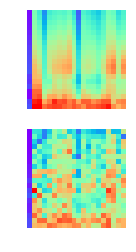

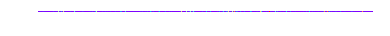

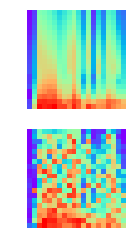

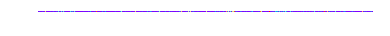

5.313104819675674 10.148825961646253


In [2]:
with tf.Session() as sess:  
    
    tf.local_variables_initializer().run()
    tf.global_variables_initializer().run()
    
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess=sess,coord=coord)
    
    saver = tf.train.import_meta_graph('saver/SAE2/SAE.meta')
    saver.restore(sess,'saver/SAE2/SAE')  
    h = tf.get_collection('output_y')[0]
    y = tf.get_collection('output_y')[1]
    #l = tf.get_collection('output_y')[2]
    
    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("input_x:0")
    
    hidden1,outputdata1 = sess.run([h,y],feed_dict ={x:[power1]})
    hidden2,outputdata2 = sess.run([h,y],feed_dict ={x:[power2]})
    
    power1 = np.reshape(power1,(20,fig_size))
    power2 = np.reshape(power2,(20,fig_size))
    outputdata1 = np.reshape(outputdata1,(20,fig_size))
    outputdata2 = np.reshape(outputdata2,(20,fig_size))
    #hidden1 = np.reshape(hidden1,(8,8))
    #hidden2 = np.reshape(hidden2,(8,8))
    
    
    plt.subplot(2,1,1)
    plt.imshow(power1,cmap=plt.get_cmap('rainbow'))
    plt.axis('off')
    plt.subplot(2,1,2)
    plt.imshow(outputdata1,cmap=plt.get_cmap('rainbow'))
    plt.axis('off')
    plt.figure()
    plt.imshow(hidden1,cmap=plt.get_cmap('rainbow'))
    plt.axis('off')
    plt.show()
    
    plt.subplot(2,1,1)
    plt.imshow(power2,cmap=plt.get_cmap('rainbow'))
    plt.axis('off')
    plt.subplot(2,1,2)
    plt.imshow(outputdata2,cmap=plt.get_cmap('rainbow'))
    plt.axis('off')
    plt.figure()
    plt.imshow(hidden2,cmap=plt.get_cmap('rainbow'))
    plt.axis('off')
    plt.show()
    
    loss1 = sum((power1 - outputdata1)**2)
    loss2 = sum((power2 - outputdata2)**2)
    print(loss1,loss2)
    
#    similar1 = 1 - loss1 * 10
#    similar2 = 1 - loss2 * 10
#    print(similar1,similar2)
    
#     power1 = power1.flatten()
#     power2 = power2.flatten()
#     outputdata1 = outputdata1.flatten()
#     outputdata2 = outputdata2.flatten()
#     power1_norm = sqrt((power1 ** 2).sum())
#     power2_norm = sqrt((power2 ** 2).sum())
#     outputdata1_norm = sqrt((outputdata1 ** 2).sum())
#     outputdata2_norm = sqrt((outputdata2 ** 2).sum())
#     p1o1 = (power1 * outputdata1).sum()
#     p2o2 = (power2 * outputdata2).sum()
#     cos1 = p1o1 / power1_norm / outputdata1_norm
#     cos2 = p2o2 / power2_norm / outputdata2_norm
#     print(cos1,cos2)
    
    #if loss1 > 2:
    #    loss1 = 2
    #if loss2 > 2:
    #    loss2 = 2
    #print("%d%%"%((2-loss1)*50),"%d%%"%((2-loss2)*50))
    
    
    coord.request_stop()
    coord.join(thread)

In [3]:
print(hidden1)

[[2.32446822e-03 2.79544201e-02 1.07544735e-02 2.12757774e-02
  8.68328940e-03 1.27703464e-03 2.98995115e-02 8.94137286e-03
  3.88970412e-02 1.51606584e-02 3.51814204e-03 1.48575334e-02
  2.27116118e-03 8.97526927e-03 2.03087600e-03 3.58033157e-03
  2.32983194e-02 7.40099640e-04 1.68777548e-03 4.68242494e-03
  1.09849405e-03 1.21001061e-02 1.17909033e-02 6.83188215e-02
  5.77066606e-03 6.47620708e-02 4.74168570e-04 2.87199579e-02
  4.85252105e-02 7.05351762e-04 5.57558298e-01 4.40520234e-02
  1.42960446e-02 7.45606143e-03 7.21130334e-03 1.58220336e-01
  1.60269684e-03 1.11648475e-03 6.32359385e-01 1.74702760e-02
  1.19102066e-02 1.55754993e-02 5.09536639e-03 1.20229404e-02
  1.46281533e-03 3.33250454e-03 1.10049092e-03 1.84880861e-03
  4.81492467e-02 1.39597794e-02 2.13554734e-03 1.06515111e-02
  1.74168160e-03 1.05695762e-02 4.23627287e-01 1.33427763e-02
  8.85184668e-03 7.78181385e-03 3.39345279e-04 9.17786092e-05
  1.65338081e-03 4.67038131e-04 1.11507066e-01 8.78488645e-03
  4.2944